## Import libraries and load data

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sets = pd.read_csv('datasets/sets.csv')
display(sets.shape)
sets.head()

(11866, 5)

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [4]:
lego_sets = pd.read_csv('datasets/lego_sets.csv')
display(lego_sets.shape)
lego_sets.head()

(11986, 6)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [5]:
themes = pd.read_csv('datasets/themes.csv')
display(themes.shape)
themes.head()

(614, 3)

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [6]:
parent_themes = pd.read_csv('datasets/parent_themes.csv')
display(parent_themes.shape)
parent_themes.head()

(111, 3)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


## Data validation

In [7]:
# Test
keys = ['sets', 'lego_sets', 'themes', 'parent_themes']
values = [sets, lego_sets, themes, parent_themes]
for z1, z2 in zip(keys, values):
    shape = z2.shape
    ncol = z2.shape[1]
    dup = z2.duplicated().sum()
    na = z2.isna().sum()
    uq = z2.nunique()
    datalists = dict()
    keys_p = ['duplicates', 'na', 'unique', 'dtype']
    keys_d = ['non-null count', 'mean/mode', 'std', 'min', '25%', '50%', '75%', 'max']
    for k in (keys_p + keys_d):
        datalists[k] = []
    for col in range(ncol):  #loading keys_p values
        datalists['duplicates'].append(z2.iloc[:,col].duplicated().sum())
        datalists['na'].append(z2.isna().sum()[col])
        datalists['unique'].append(z2.nunique()[col])
        datalists['dtype'].append(z2.dtypes[col])
    for k2 in enumerate(keys_d):  # loading keys_d values
        for col in range(ncol):
            if len(z2.iloc[:,col].describe())==8: # describe method outputs 8 values on numeric columns, 4 on others
                datalists[k2[1]].append(round(z2.iloc[:,col].describe()[k2[0]],2))
            else:
                if k2[1]=='non-null count':
                    datalists[k2[1]].append(z2.count()[col])
                elif k2[1]=='mean/mode':
                    datalists[k2[1]].append(z2.iloc[:,col].mode()[0])
                else:
                    datalists[k2[1]].append('NC')
    print(z1, 'dataframe - ', f'shape:{shape}', f'dupl:{dup}')
    display(pd.DataFrame(datalists, index = pd.MultiIndex.from_tuples([c for c in enumerate(z2.columns)], names=['#', 'Column'])))

sets dataframe -  shape:(11866, 5) dupl:0


,,duplicates,na,unique,dtype,non-null count,mean/mode,std,min,25%,50%,75%,max
#,Column,,,,,,,,,,,,
0,set_num,0,0,11866,object,11866.0,00-1,NC,NC,NC,NC,NC,NC
1,name,1323,0,10543,object,11866.0,Basic Building Set,NC,NC,NC,NC,NC,NC
2,year,11800,0,66,int64,11866.0,2002.21,13.5,1950.0,1997.0,2006.0,2013.0,2017.0
3,theme_id,11281,0,585,int64,11866.0,314.37,179.39,1.0,165.0,327.0,473.0,619.0
4,num_parts,10749,0,1117,int64,11866.0,165.14,336.38,-1.0,10.25,46.0,174.0,5922.0


lego_sets dataframe -  shape:(11986, 6) dupl:44


,,duplicates,na,unique,dtype,non-null count,mean/mode,std,min,25%,50%,75%,max
#,Column,,,,,,,,,,,,
0,set_num,152,153,11833,object,11833.0,00-1,NC,NC,NC,NC,NC,NC
1,name,1473,153,10512,object,11833.0,Basic Building Set,NC,NC,NC,NC,NC,NC
2,year,11920,0,66,int64,11986.0,2002.3,13.47,1950.0,1997.0,2006.0,2013.0,2017.0
3,num_parts,11087,5060,898,float64,6926.0,163.78,334.21,-1.0,10.25,46.0,173.0,5922.0
4,theme_name,11595,153,390,object,11833.0,Supplemental,NC,NC,NC,NC,NC,NC
5,parent_theme,11877,0,109,object,11986.0,Town,NC,NC,NC,NC,NC,NC


themes dataframe -  shape:(614, 3) dupl:0


,,duplicates,na,unique,dtype,non-null count,mean/mode,std,min,25%,50%,75%,max
#,Column,,,,,,,,,,,,
0,id,0,0,614,int64,614.0,307.5,177.39,1.0,154.25,307.5,460.75,614.0
1,name,212,0,402,object,614.0,Supplemental,NC,NC,NC,NC,NC,NC
2,parent_id,535,111,78,float64,503.0,274.29,176.07,1.0,126.0,264.0,430.0,591.0


parent_themes dataframe -  shape:(111, 3) dupl:0


,,duplicates,na,unique,dtype,non-null count,mean/mode,std,min,25%,50%,75%,max
#,Column,,,,,,,,,,,,
0,id,0,0,111,int64,111.0,405.27,145.44,1.0,298.5,411.0,505.5,610.0
1,name,0,0,111,object,111.0,4 Juniors,NC,NC,NC,NC,NC,NC
2,is_licensed,109,0,2,bool,111.0,False,NC,NC,NC,NC,NC,NC


In [8]:
#creating data validation summary
dicts = {}
list_m = []
list_u = []
list_t = []
keys = ['sets', 'lego_sets', 'themes', 'parent_themes']
values = [sets, lego_sets, themes, parent_themes]
for z1, z2 in zip(keys, values):
        nrow = z2.shape[0]
        ncol = z2.shape[1]
        ndup = z2.duplicated().sum()
        nmiss = {}
        nuniq = {}
        dtype = {}
        for col in range(ncol):
                nmiss[z2.columns[col]] = z2.isna().sum()[col]
                nuniq[z2.columns[col]] = z2.nunique()[col]
                dtype[z2.columns[col]] = z2.dtypes[col]
        dicts[z1] = [nrow, ncol, ndup, nmiss, nuniq, dtype]
        list_m.append(nmiss)
        list_u.append(nuniq)
        list_t.append(dtype)
#print(nmiss)
#print(dicts)
dv_summary = pd.DataFrame(dicts, index = ['nrow', 'ncol', 'ndup', 'nmiss', 'nuniq', 'dtype'])
display(dv_summary)

,sets,lego_sets,themes,parent_themes
nrow,11866,11986,614,111
ncol,5,6,3,3
ndup,0,44,0,0
nmiss,"{'set_num': 0, 'name': 0, 'year': 0, 'theme_id...","{'set_num': 153, 'name': 153, 'year': 0, 'num_...","{'id': 0, 'name': 0, 'parent_id': 111}","{'id': 0, 'name': 0, 'is_licensed': 0}"
nuniq,"{'set_num': 11866, 'name': 10543, 'year': 66, ...","{'set_num': 11833, 'name': 10512, 'year': 66, ...","{'id': 614, 'name': 402, 'parent_id': 78}","{'id': 111, 'name': 111, 'is_licensed': 2}"
dtype,"{'set_num': object, 'name': object, 'year': in...","{'set_num': object, 'name': object, 'year': in...","{'id': int64, 'name': object, 'parent_id': flo...","{'id': int64, 'name': object, 'is_licensed': b..."


In [8]:
for z1, z2 in zip(keys, values):
    display(z1, z2.dtypes)

'sets'

set_num      object
name         object
year          int64
theme_id      int64
num_parts     int64
dtype: object

'lego_sets'

set_num          object
name             object
year              int64
num_parts       float64
theme_name       object
parent_theme     object
dtype: object

'themes'

id             int64
name          object
parent_id    float64
dtype: object

'parent_themes'

id              int64
name           object
is_licensed      bool
dtype: object

Notes :
- there are some similarity between 2 pairs of datasets : (lego_sets, sets) as well as (parent_themes, themes)
    - 'sets' and 'lego_sets' : 'lego_sets' seems to overlap 'sets' => could be paired using appropriate join
    - 'themes' and 'parent_themes' : it seems that themes names could be group by 'parent_id'
- although columns are named following conventions, some have inconsistent datatypes : 
    - 'float' for 'num_parts' in 'lego_sets' 
    - 'float' for 'parent_id' in 'themes'
    => is it because for NaN ?
- duplicates and missing values are identified in 'lego_sets' and 'themes' dataframes

## 3 Cleaning and merging datasets

In [9]:
print(lego_sets.num_parts.isna().sum())
print(themes.parent_id.isna().sum())

5060
111


Hypothesis confirmed => lots of NaN in 'num_parts' and 'parent_id' columns.
Issue could be that merging 'themes' to 'parent_themes' would not work...

### 3.1 Cleaning themes / parent_themes datasets

In [10]:
themes_full = themes.merge(parent_themes, how='left', left_on='parent_id', right_on='id', suffixes=['', '_p'])
themes_full

,id,name,parent_id,id_p,name_p,is_licensed
0,1,Technic,NaN,NaN,NaN,NaN
1,2,Arctic Technic,1.0,1.0,Technic,False
2,3,Competition,1.0,1.0,Technic,False
3,4,Expert Builder,1.0,1.0,Technic,False
4,5,Model,1.0,1.0,Technic,False
...,...,...,...,...,...,...
609,610,Brickheadz,NaN,NaN,NaN,NaN
610,611,Series 17 Minifigures,535.0,535.0,Collectible Minifigures,False
611,612,Star Wars Episode 8,158.0,158.0,Star Wars,True
612,613,Freemakers,158.0,158.0,Star Wars,True


In [11]:
themes_full['id_parent'] = themes_full.parent_id.combine_first(themes_full.id_p)
themes2 = themes_full[['id', 'name', 'id_parent', 'name_p', 'is_licensed']].rename(columns={'name_p':'name_parent'})
themes2

,id,name,id_parent,name_parent,is_licensed
0,1,Technic,NaN,NaN,NaN
1,2,Arctic Technic,1.0,Technic,False
2,3,Competition,1.0,Technic,False
3,4,Expert Builder,1.0,Technic,False
4,5,Model,1.0,Technic,False
...,...,...,...,...,...
609,610,Brickheadz,NaN,NaN,NaN
610,611,Series 17 Minifigures,535.0,Collectible Minifigures,False
611,612,Star Wars Episode 8,158.0,Star Wars,True
612,613,Freemakers,158.0,Star Wars,True


In [12]:
themes2.name_parent.nunique()

50

### 3.2 Cleaning sets / lego_sets datasets

In [13]:
#cleaning duplicates in whole dataframe
lego_sets_nodup = lego_sets[lego_sets.duplicated()==False]
lego_sets_nodup

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11975,NaN,NaN,2010,442.0,NaN,Harry Potter
11976,NaN,NaN,2012,44.0,NaN,Super Heroes
11978,NaN,NaN,2004,485.0,NaN,Super Heroes
11979,NaN,NaN,2016,561.0,NaN,Super Heroes


In [14]:
#How many NaN values in 'set_num' column ?
lego_sets_nodup[lego_sets_nodup.set_num.isna()==True]

,set_num,name,year,num_parts,theme_name,parent_theme
11833,NaN,NaN,2017,347.0,NaN,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess
11835,NaN,NaN,2016,NaN,NaN,Disney Princess
11836,NaN,NaN,2017,304.0,NaN,Super Heroes
11837,NaN,NaN,2017,196.0,NaN,Super Heroes
...,...,...,...,...,...,...
11975,NaN,NaN,2010,442.0,NaN,Harry Potter
11976,NaN,NaN,2012,44.0,NaN,Super Heroes
11978,NaN,NaN,2004,485.0,NaN,Super Heroes
11979,NaN,NaN,2016,561.0,NaN,Super Heroes


As confirmed in Project introduction, we can drop NaN rows coming from 'set_num'

In [15]:
#cleaning 'set_num' column
lego_sets_clean = lego_sets_nodup[lego_sets_nodup.set_num.isna()==False]
lego_sets_clean

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [16]:
lego_sets_clean.set_num.nunique()

11833

In [17]:
lego_sets_clean.parent_theme.isna().sum()

0

All parent names are populated

### 3.3 Merging datasets

In [18]:
lego_merged = pd.merge(lego_sets_clean, parent_themes, how='left', left_on='parent_theme', right_on='name', suffixes=[None,'_ptheme'])
lego_merged

,set_num,name,year,num_parts,theme_name,parent_theme,id,name_ptheme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,Space,False
...,...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,LEGO Brand Store,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,Promotional,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,LEGO Brand Store,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,Friends,False


In [19]:
set(lego_merged.parent_theme).difference(set(lego_merged.name_ptheme))

set()

Thus we can drop 'name_ptheme'

In [20]:
lego_merged2 = lego_merged.drop(columns='name_ptheme')
lego_merged2

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


## 4 What's the proportion of licensed sets related to Star Wars ? (1st Q)

In [21]:
lego_merged2.is_licensed.value_counts()

False    10654
True      1179
Name: is_licensed, dtype: int64

There's no Na in 'is_licensed' column.

In [22]:
lego_licensed = lego_merged2[(lego_merged2.is_licensed==True)]
lego_licensed

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [23]:
from locale import normalize
lego_licensed.theme_name.str.contains('Star Wars').value_counts(normalize=True)

False    0.541137
True     0.458863
Name: theme_name, dtype: float64

In [24]:
the_force = 46

## 5 Which year was Star Wars NOT the most popular license ? (2nd Q)

In [25]:
lego_sorted = lego_licensed.sort_values(['year', 'set_num'])
lego_sorted

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed
7607,7101-1,Lightsaber Duel,1999,NaN,Star Wars Episode 1,Star Wars,158,True
7728,7110-1,Landspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
7730,7111-1,Droid Fighter,1999,NaN,Star Wars Episode 1,Star Wars,158,True
7752,7121-1,Naboo Swamp,1999,82.0,Star Wars Episode 1,Star Wars,158,True
7799,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,158,True
...,...,...,...,...,...,...,...,...
11765,SW911723-1,Vulture Droid foil pack,2017,NaN,Star Wars Episode 3,Star Wars,158,True
11766,SW911724-1,A-Wing,2017,47.0,Star Wars Rebels,Star Wars,158,True
11767,SW911725-1,Sandcrawler,2017,NaN,Star Wars,Star Wars,158,True
11768,SW911726-1,Imperial Snowtrooper,2017,NaN,Star Wars Episode 4/5/6,Star Wars,158,True


In [26]:
lego_sorted['star_wars_theme'] = lego_sorted.theme_name.str.contains('Star Wars')
lego_sorted

,set_num,name,year,num_parts,theme_name,parent_theme,id,is_licensed,star_wars_theme
7607,7101-1,Lightsaber Duel,1999,NaN,Star Wars Episode 1,Star Wars,158,True,True
7728,7110-1,Landspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,True
7730,7111-1,Droid Fighter,1999,NaN,Star Wars Episode 1,Star Wars,158,True,True
7752,7121-1,Naboo Swamp,1999,82.0,Star Wars Episode 1,Star Wars,158,True,True
7799,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,158,True,True
...,...,...,...,...,...,...,...,...,...
11765,SW911723-1,Vulture Droid foil pack,2017,NaN,Star Wars Episode 3,Star Wars,158,True,True
11766,SW911724-1,A-Wing,2017,47.0,Star Wars Rebels,Star Wars,158,True,True
11767,SW911725-1,Sandcrawler,2017,NaN,Star Wars,Star Wars,158,True,True
11768,SW911726-1,Imperial Snowtrooper,2017,NaN,Star Wars Episode 4/5/6,Star Wars,158,True,True


<AxesSubplot:xlabel='year', ylabel='count'>

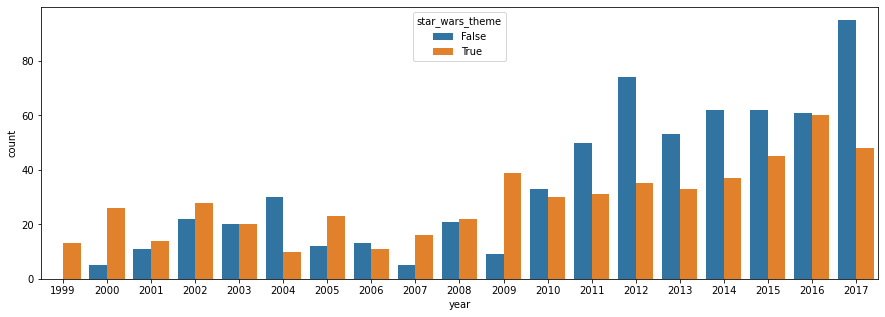

In [27]:
f, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='year', data=lego_sorted, hue='star_wars_theme')

In [28]:
lego_grouped = lego_sorted.groupby('year')[['is_licensed', 'star_wars_theme']].sum()
lego_grouped.head()

,is_licensed,star_wars_theme
year,,
1999,13,13
2000,31,26
2001,25,14
2002,50,28
2003,40,20


In [29]:
lego_grouped2 = lego_sorted.groupby(['year','parent_theme'])[['is_licensed']].sum()
lego_grouped2.head(10)

is_licensed
year parent_theme                      
1999 Star Wars                       13
2000 Disney's Mickey Mouse            5
     Star Wars                       26
2001 Harry Potter                    11
     Star Wars                       14
2002 Harry Potter                    19
     Star Wars                       28
     Super Heroes                     3
2003 Harry Potter                     3
     Star Wars                       32

In [30]:
lego_grouped2['rank'] = lego_grouped2.groupby('year')[['is_licensed']].rank('min', ascending=False)
lego_grouped2

is_licensed  rank
year parent_theme                               
1999 Star Wars                          13   1.0
2000 Disney's Mickey Mouse               5   2.0
     Star Wars                          26   1.0
2001 Harry Potter                       11   2.0
     Star Wars                          14   1.0
...                                    ...   ...
2017 Disney Princess                     6   4.0
     Minecraft                           9   3.0
     Pirates of the Caribbean            1   5.0
     Star Wars                          55   2.0
     Super Heroes                       72   1.0

[83 rows x 2 columns]

In [31]:
lego_grouped3 = lego_grouped2.sort_values(['year','rank']).reset_index(level=1)
lego_grouped3.head(20)

,parent_theme,is_licensed,rank
year,,,
1999,Star Wars,13,1.0
2000,Star Wars,26,1.0
2000,Disney's Mickey Mouse,5,2.0
2001,Star Wars,14,1.0
2001,Harry Potter,11,2.0
2002,Star Wars,28,1.0
2002,Harry Potter,19,2.0
2002,Super Heroes,3,3.0
2003,Star Wars,32,1.0


In [32]:
lego_grouped3[lego_grouped3['rank']==1]

,parent_theme,is_licensed,rank
year,,,
1999,Star Wars,13,1.0
2000,Star Wars,26,1.0
2001,Star Wars,14,1.0
2002,Star Wars,28,1.0
2003,Star Wars,32,1.0
2004,Star Wars,20,1.0
2005,Star Wars,28,1.0
2006,Star Wars,11,1.0
2007,Star Wars,16,1.0


In [35]:
lego_grouped3[(lego_grouped3['rank']==1) & (lego_grouped3['parent_theme']!='Star Wars')].index.min()

2017

In [80]:
new_era = 2017

In [36]:
lego_grouped3.parent_theme.nunique()

22

In [79]:
lego_grouped_top = lego_grouped3[lego_grouped3['parent_theme'].isin(['Star Wars', 'Super Heroes'])]
lego_grouped_top.head(10)

,parent_theme,is_licensed,rank
year,,,
1999,Star Wars,13,1.0
2000,Star Wars,26,1.0
2001,Star Wars,14,1.0
2002,Star Wars,28,1.0
2002,Super Heroes,3,3.0
2003,Star Wars,32,1.0
2003,Super Heroes,5,2.0
2004,Star Wars,20,1.0
2004,Super Heroes,6,3.0


<AxesSubplot:xlabel='year', ylabel='is_licensed'>

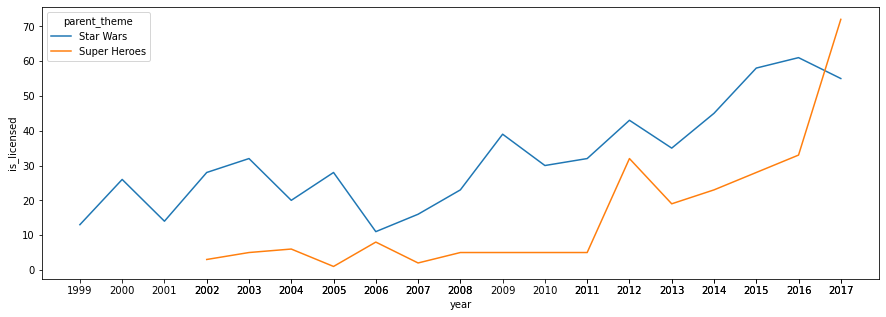

In [78]:
f, ax = plt.subplots(figsize=(15,5))
ax.set_xticks(lego_grouped_top.index)
sns.lineplot(x='year', y='is_licensed', data=lego_grouped_top.reset_index(), hue='parent_theme')